In [117]:
import cv2
import face_recognition
import os
import glob
import matplotlib.pyplot as plt
vc = cv2.VideoCapture(0)


In [118]:

known_faces = []
known_names = []
known_faces_paths = []


In [119]:
registered_faces_path = 'registered/'
for name in os.listdir(registered_faces_path):
    images_mask = '%s%s/*.jpg' % (registered_faces_path, name)
    images_paths = glob.glob(images_mask) 
    known_faces_paths += images_paths
    known_names += [name for x in images_paths]


In [120]:
for name,images_path in zip(known_names, known_faces_paths):
    print('%s: %s' % (name, images_path))

elon: registered/elon\1.jpg
elon: registered/elon\2.jpg
elon: registered/elon\3.jpg
elon: registered/elon\4.jpg
elon: registered/elon\5.jpg
elon: registered/elon\8.jpg
mark: registered/mark\10.jpg
mark: registered/mark\2.jpg
mark: registered/mark\3.jpg
mark: registered/mark\4.jpg
mark: registered/mark\5.jpg
mark: registered/mark\6.jpg
mark: registered/mark\7.jpg
osamah: registered/osamah\1112.jpg
osamah: registered/osamah\112.JPG
osamah: registered/osamah\113.JPG
osamah: registered/osamah\117.jpg
osamah: registered/osamah\118.jpg
osamah: registered/osamah\123.JPG
osamah: registered/osamah\1231.JPG
osamah: registered/osamah\5345.JPG
osamah: registered/osamah\WIN_20250211_01_20_39_Pro.jpg
osamah: registered/osamah\WIN_20250211_01_20_42_Pro.jpg
osamah: registered/osamah\WIN_20250211_01_20_44_Pro.jpg
osamah: registered/osamah\WIN_20250211_01_20_48_Pro.jpg
osamah: registered/osamah\WIN_20250211_01_20_52_Pro.jpg
uncal: registered/uncal\1.jpg
uncal: registered/uncal\2.jpg
uncal: registered/un

In [121]:
def get_encodings(img_path):
    image = face_recognition.load_image_file(img_path)
    encoding = face_recognition.face_encodings(image)
    return encoding[0]


In [122]:
known_faces = [get_encodings(img_path) for img_path in known_faces_paths]


In [123]:
unknown_images = glob.glob('unknown/*.jpg')

C:\Users\Osamah\AppData\Local\Temp\ipykernel_6464\4053128782.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


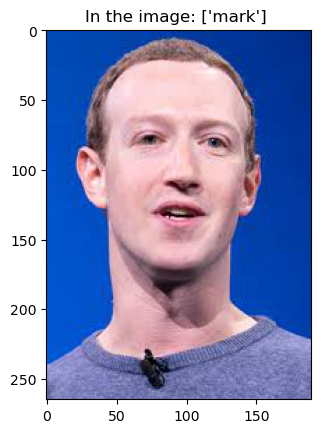

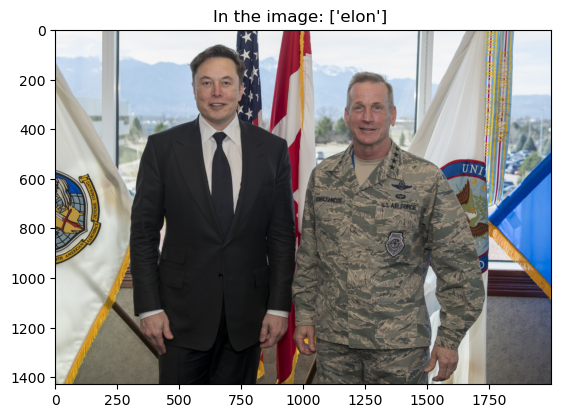

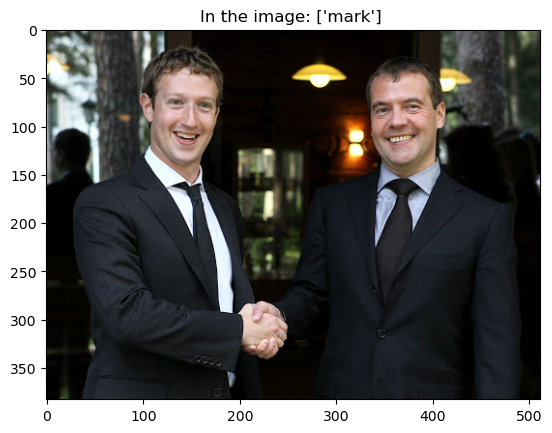

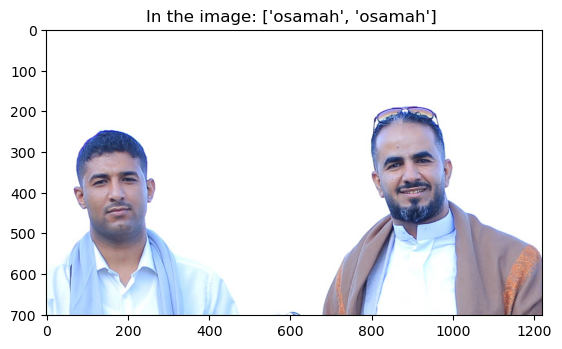

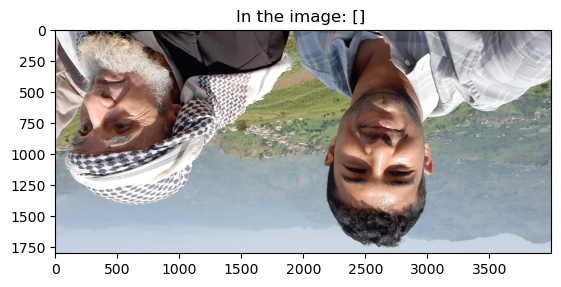

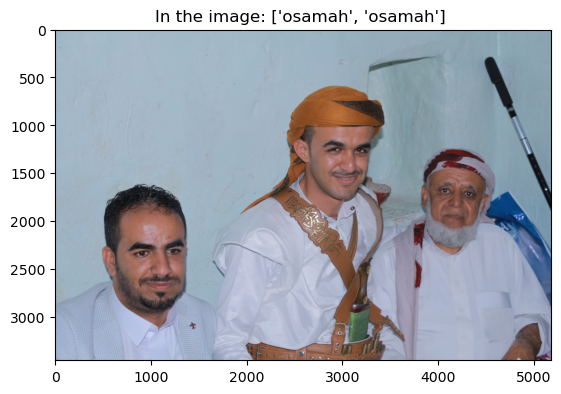

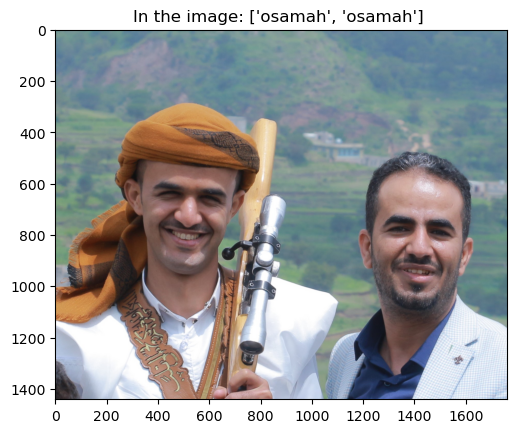

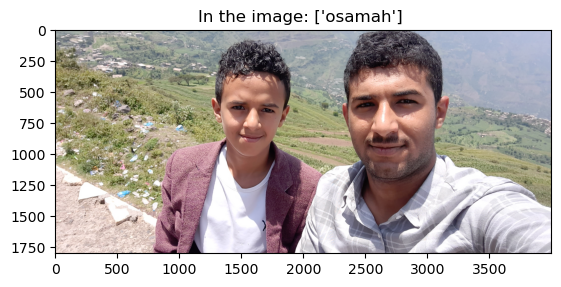

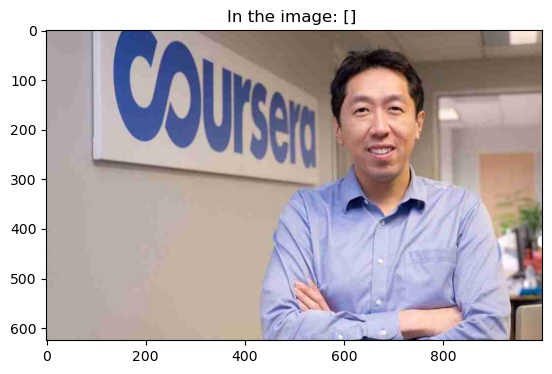

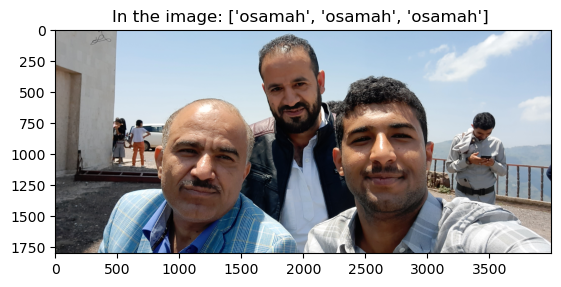

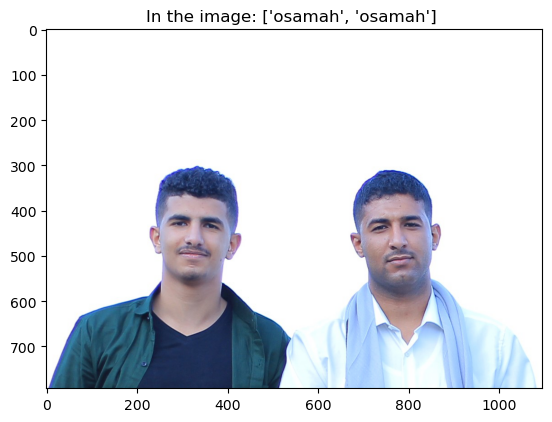

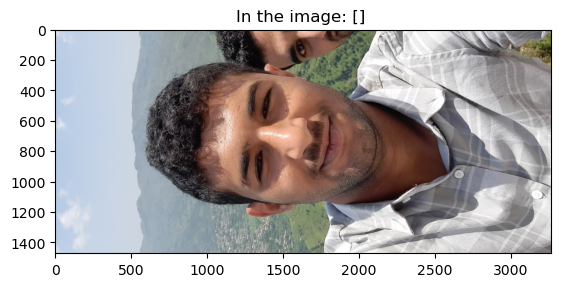

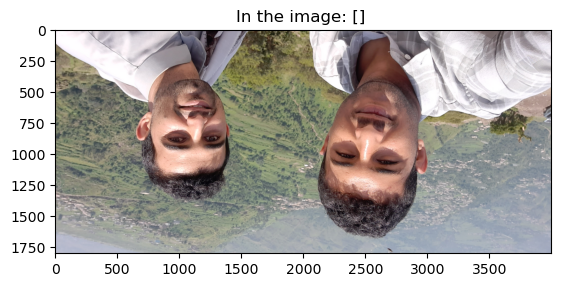

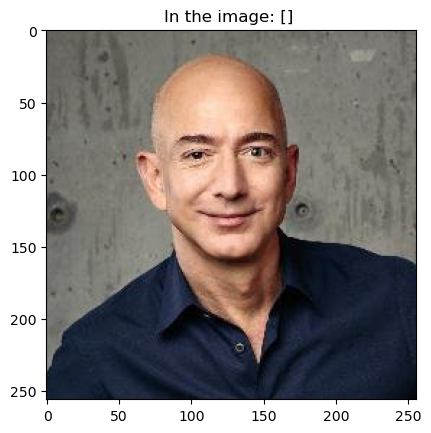

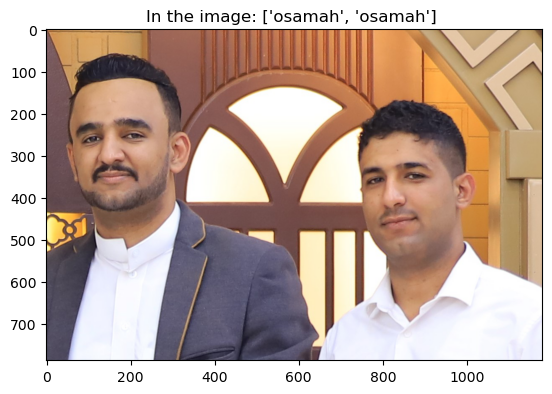

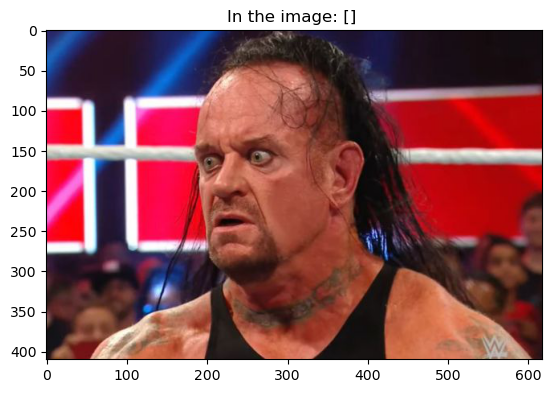

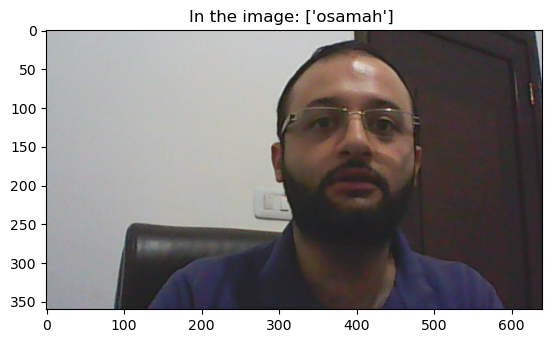

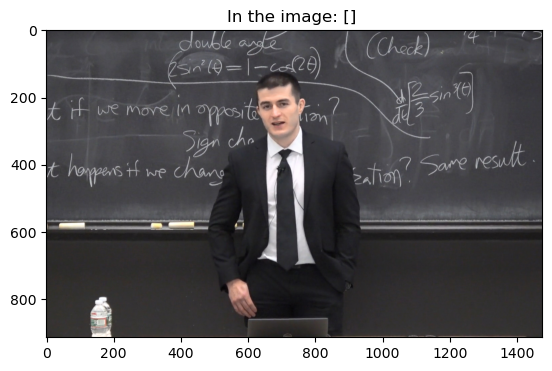

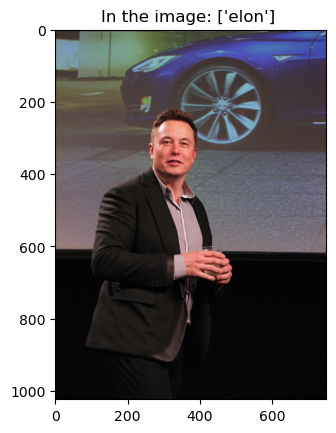

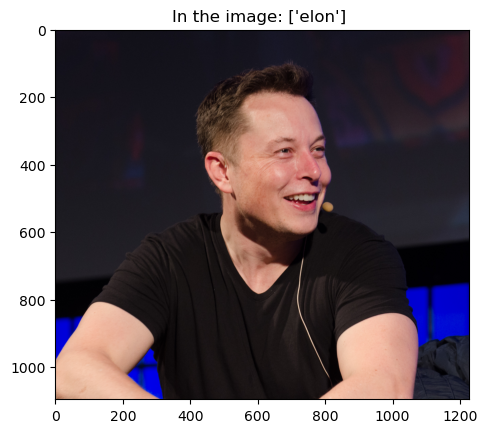

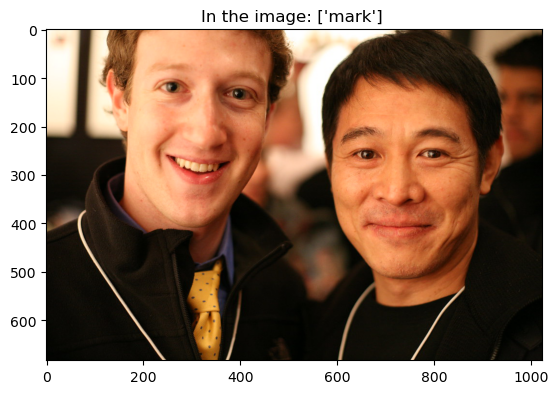

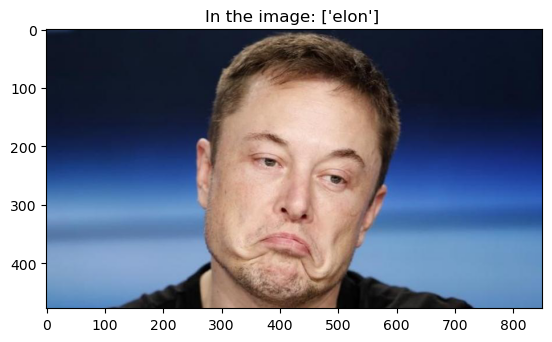

In [124]:
for img_path in unknown_images:
    img = plt.imread(img_path)
    plt.figure()
    plt.imshow(img)
    encodings = face_recognition.face_encodings(img)
    found_faces = []
    for face_code in encodings:
        results = face_recognition.compare_faces(known_faces, face_code, tolerance=0.6)
        if any(results):
            found_faces.append(known_names[results.index(True)])
        
    plt.title('In the image: %s ' % str(found_faces))

In [125]:
while True:
    ret, frame = vc.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = face_recognition.face_locations(frame_rgb)
    for face in faces: # top, right, bottom, left
        top, right, bottom, left = face
        cv2.rectangle(frame, (left, top), (right, bottom),(0,0,255), 2)
        face_code = face_recognition.face_encodings(frame_rgb, [face])[0]

        results = face_recognition.compare_faces(known_faces, face_code, tolerance=0.6)
        if any(results):
            name = known_names[results.index(True)]
        else:
            name = 'unknown'
        cv2.putText(frame, name, (left, bottom + 20), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 2)

    cv2.imshow('winnie', frame)
    k = cv2.waitKey(1)
    if ord('q') == k:
        break
cv2.destroyAllWindows()
vc.release()